In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(10)
n = 50_000

escolaridade = ['Ensino Fundamental', 'Ensino Médio', 'Ensino Superior']

data = {
    'Id': np.arange(1, n+1),
    'Idade': np.random.randint(18, 70, size = n),
    'Renda': np.random.randint(1_500, 10_000, size = n),
    'Sexo': np.random.choice(['Masculino', 'Feminino'], size = n),
    'Escolaridade': np.random.choice(escolaridade, size = n)
}

df = pd.DataFrame(data)

In [3]:
df

,Id,Idade,Renda,Sexo,Escolaridade
0,1,27,2554,Feminino,Ensino Fundamental
1,2,54,2475,Feminino,Ensino Superior
2,3,33,6820,Masculino,Ensino Superior
3,4,18,2141,Masculino,Ensino Médio
4,5,67,7381,Masculino,Ensino Fundamental
...,...,...,...,...,...
49995,49996,41,3102,Feminino,Ensino Superior
49996,49997,33,3906,Feminino,Ensino Superior
49997,49998,41,2543,Masculino,Ensino Superior
49998,49999,22,4651,Feminino,Ensino Superior


### Inserção de colunas

In [4]:
np.random.seed(7)

ativos = pd.Series(np.random.normal(3_000, 1000, size = n)).round(2)

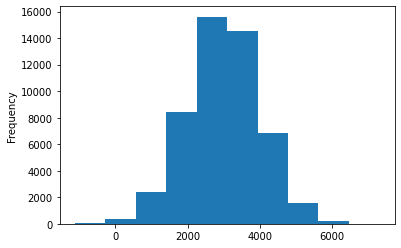

In [7]:
ativos.plot(kind = 'hist');

In [8]:
# cria coluna de ativos
df['ativo'] = ativos

In [9]:
df

,Id,Idade,Renda,Sexo,Escolaridade,ativo
0,1,27,2554,Feminino,Ensino Fundamental,4690.53
1,2,54,2475,Feminino,Ensino Superior,2534.06
2,3,33,6820,Masculino,Ensino Superior,3032.82
3,4,18,2141,Masculino,Ensino Médio,3407.52
4,5,67,7381,Masculino,Ensino Fundamental,2211.08
...,...,...,...,...,...,...
49995,49996,41,3102,Feminino,Ensino Superior,1362.16
49996,49997,33,3906,Feminino,Ensino Superior,3352.40
49997,49998,41,2543,Masculino,Ensino Superior,3246.91
49998,49999,22,4651,Feminino,Ensino Superior,3293.22


In [10]:
# cria coluna de renda total
df['renda_total'] = df['Renda']+df['ativo']

In [11]:
df

,Id,Idade,Renda,Sexo,Escolaridade,ativo,renda_total
0,1,27,2554,Feminino,Ensino Fundamental,4690.53,7244.53
1,2,54,2475,Feminino,Ensino Superior,2534.06,5009.06
2,3,33,6820,Masculino,Ensino Superior,3032.82,9852.82
3,4,18,2141,Masculino,Ensino Médio,3407.52,5548.52
4,5,67,7381,Masculino,Ensino Fundamental,2211.08,9592.08
...,...,...,...,...,...,...,...
49995,49996,41,3102,Feminino,Ensino Superior,1362.16,4464.16
49996,49997,33,3906,Feminino,Ensino Superior,3352.40,7258.40
49997,49998,41,2543,Masculino,Ensino Superior,3246.91,5789.91
49998,49999,22,4651,Feminino,Ensino Superior,3293.22,7944.22


In [12]:
# renda média total dos indivíduos
df.loc[:, ['Renda', 'ativo']].mean()

Renda    5746.135880
ativo    2995.777078
dtype: float64

In [13]:
# renda média dos indivíduos
df.loc[:, ['Renda', 'ativo']].mean(axis = 1)

0        3622.265
1        2504.530
2        4926.410
3        2774.260
4        4796.040
           ...   
49995    2232.080
49996    3629.200
49997    2894.955
49998    3972.110
49999    2583.720
Length: 50000, dtype: float64

In [14]:
# outra forma de calcular a renda média dos indivíduos
((df['Renda']+df['ativo'])/2)

0        3622.265
1        2504.530
2        4926.410
3        2774.260
4        4796.040
           ...   
49995    2232.080
49996    3629.200
49997    2894.955
49998    3972.110
49999    2583.720
Length: 50000, dtype: float64

In [15]:
# renda média (ativos e renda)
renda_media = df.loc[:, ['Renda', 'ativo']].mean(axis = 1)

In [16]:
renda_media

0        3622.265
1        2504.530
2        4926.410
3        2774.260
4        4796.040
           ...   
49995    2232.080
49996    3629.200
49997    2894.955
49998    3972.110
49999    2583.720
Length: 50000, dtype: float64

In [17]:
df.head()

,Id,Idade,Renda,Sexo,Escolaridade,ativo,renda_total
0,1,27,2554,Feminino,Ensino Fundamental,4690.53,7244.53
1,2,54,2475,Feminino,Ensino Superior,2534.06,5009.06
2,3,33,6820,Masculino,Ensino Superior,3032.82,9852.82
3,4,18,2141,Masculino,Ensino Médio,3407.52,5548.52
4,5,67,7381,Masculino,Ensino Fundamental,2211.08,9592.08


In [19]:
df.columns.to_list().index('ativo')

5

In [20]:
# posição da coluna 'ativo'
posicao = df.columns.to_list().index('ativo')

In [21]:
# insere a coluna renda_media na posição da coluna 'ativo'
df.insert(posicao, 'renda_média', renda_media )

In [22]:
df.head()

,Id,Idade,Renda,Sexo,Escolaridade,renda_média,ativo,renda_total
0,1,27,2554,Feminino,Ensino Fundamental,3622.265,4690.53,7244.53
1,2,54,2475,Feminino,Ensino Superior,2504.530,2534.06,5009.06
2,3,33,6820,Masculino,Ensino Superior,4926.410,3032.82,9852.82
3,4,18,2141,Masculino,Ensino Médio,2774.260,3407.52,5548.52
4,5,67,7381,Masculino,Ensino Fundamental,4796.040,2211.08,9592.08
